In [3]:
from google.colab import files
uploaded = files.upload()

Saving cell_samples (1).csv to cell_samples (1).csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('cell_samples (1).csv')

In [6]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
df.isnull().sum()

,0
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,0
BlandChrom,0
NormNucl,0
Mit,0


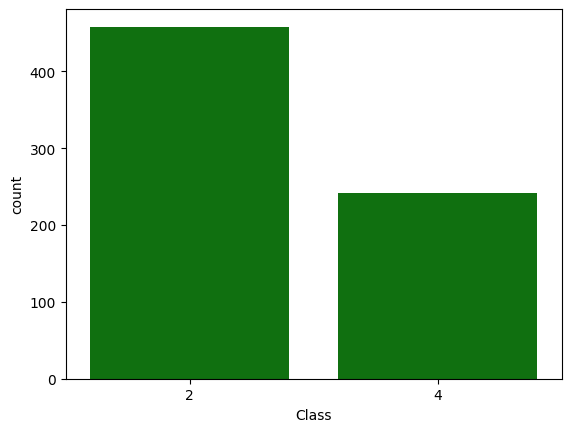

In [10]:
sns.countplot(x='Class', data=df,color='g')
plt.show()

In [11]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


In [12]:
df.drop(columns=['BareNuc'],axis=1,inplace=True)

In [13]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


In [14]:
df.shape

(699, 10)

In [15]:
# 2 ----> BENIGN
# 4-----> MALIGNANT

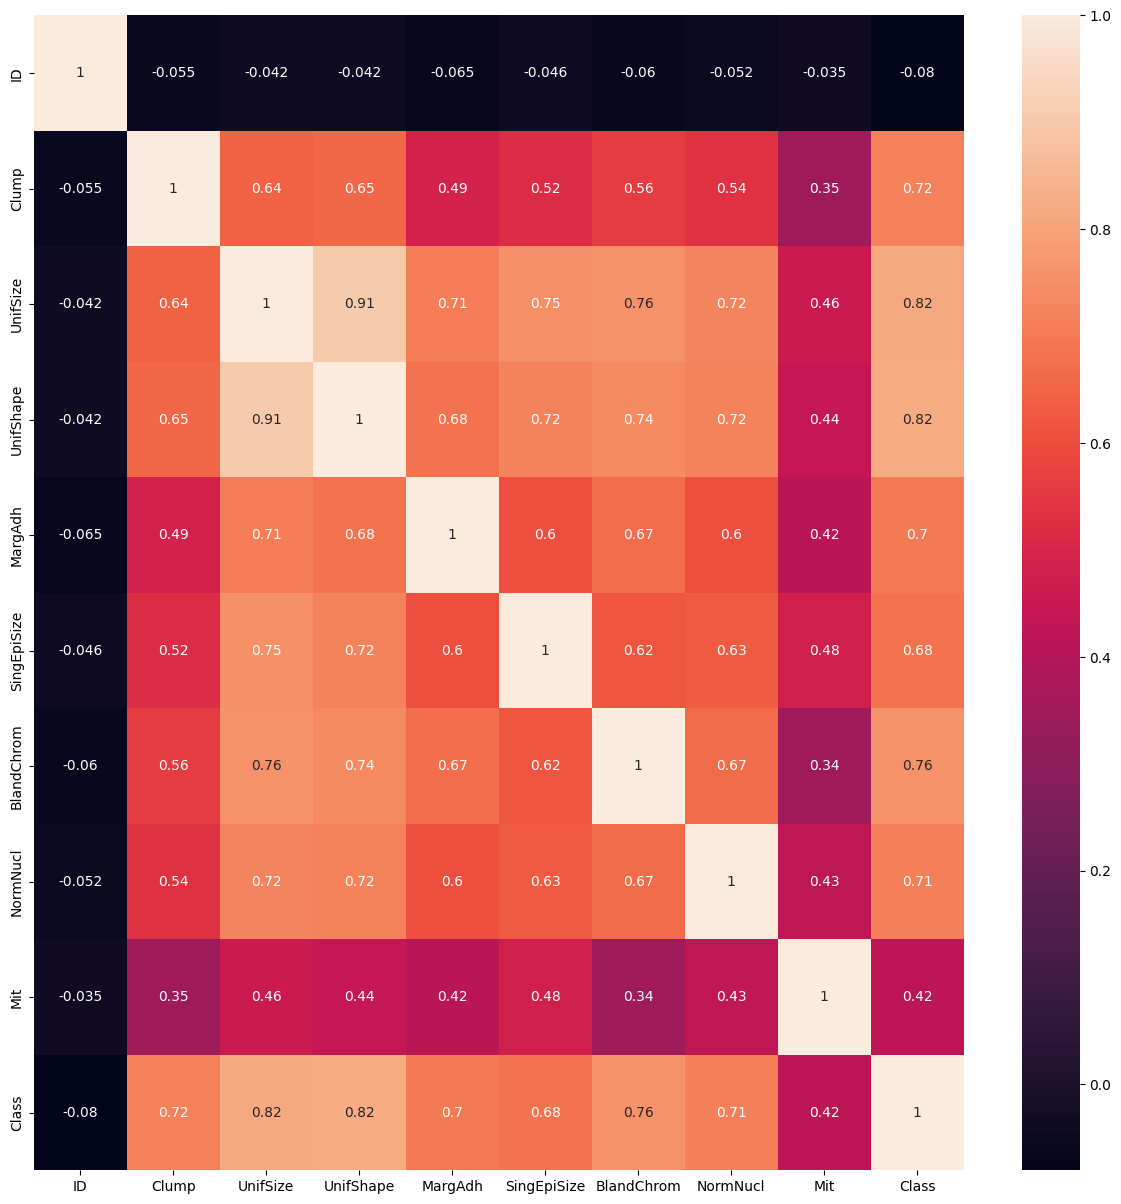

In [16]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

**CLASS** IS THE DEPENDENT VARIABLE NEEDED TO BE DETERMINED. WITH THE HELP OF HEATMAP WE FOUND SOME THE VARIABLES THAT HAVE STRONG RELATION WITH CLASS VARIABLE. THEY ARE ***"CLUMP","UNIFSIZE","UNIFSHAPE","BLANDCHROM","NORMNUCI".***

In [17]:
x=df.drop(columns=['ID','MargAdh','SingEpiSize','Mit','Class'],axis=1)
x.head()

,Clump,UnifSize,UnifShape,BlandChrom,NormNucl
0,5,1,1,3,1
1,5,4,4,3,2
2,3,1,1,3,1
3,6,8,8,3,7
4,4,1,1,3,1


In [18]:
y=df.Class
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.svm import SVC
model=SVC(kernel='linear',gamma='auto')

In [21]:
model.fit(x_train,y_train)

SVC(gamma='auto', kernel='linear')

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
print("Accuracy score is:",score)
print(classification_report(y_pred,y_test))

Accuracy score is: 0.9476190476190476
              precision    recall  f1-score   support

           2       0.94      0.98      0.96       127
           4       0.96      0.90      0.93        83

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



**PREDICTIVE SYSTEM**

In [24]:
input_data=(5,5,3,5,1)
input_data_nparray=np.asarray(input_data)
reshaped_data=input_data_nparray.reshape(1,-1)
prediction=model.predict(reshaped_data)
print(prediction)

if (prediction[0]==2):
  print('CANCER TYPE IS  BENIGN ')
else:
  print('CANCER TYPE IS MALIGNANT')

[4]
CANCER TYPE IS MALIGNANT


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [25]:
import pickle

In [26]:
pickle.dump(model,open('cancermodel.pkl','wb'))